In [2]:
!pip install keras

  Using cached https://files.pythonhosted.org/packages/34/7d/b1dedde8af99bd82f20ed7e9697aac0597de3049b1f786aa2aac3b9bd4da/Keras-2.2.2-py2.py3-none-any.whl


In [65]:
import keras
print(keras.__version__)

2.2.2


from keras.datasets import mnist

In [1]:
from keras.datasets import fashion_mnist

C:\Users\Nacho\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras import models, layers

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [4]:
model = models.Sequential() #create model for the multiple layers

In [44]:
#FIRST LAYER
model.add(layers.Dense(512,#output nodes
                       activation='relu',#activation function,, try to always use this function
                       input_shape = (28*28,)#input nodes (FIXED)
))
#SUBSEQUENT LAYERS(COPY PASTE THIS PIECE OF CODE). IF IT'S THE FINAL LAYER, SELECT ACTIVATION = SOFTMAX. IF ITS AN INTERMEDIATE LAYER, SELECT RELU

model.add(layers.Dense(10,activation='softmax'))#output nodes= 10,, softmax for the output layer
#INFO ON THE MODEL
model.summary()

model.compile(#NEURAL NETWORK NEEDS TO BE COMPILED
    optimizer = 'rmsprop', #GOOD OPTIMIZER FOR STARTING. NNs START WITH BIG STEPS AND REDUCE STEP SIZE
    loss='categorical_crossentropy',
    metrics = ['accuracy']#HOW FAR IS THE RESULT FROM THE PREDICTED RESULT. DISTANCES BETWEEN PROBABILITY DISTRIBUTION
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 512)               5632      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
__________

C:\Users\Nacho\Anaconda3\lib\site-packages\keras\engine\training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train:  (60000, 28, 28)
Test:  (10000, 28, 28)


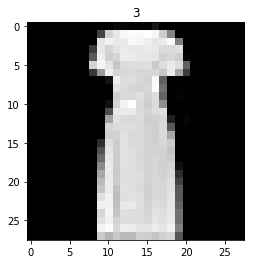

Before: 9
After: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [47]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('Train: ', train_images.shape)
print('Test: ', test_images.shape)

#print(train_images[1])

plt.imshow(train_images[50],cmap='gray')
plt.title(str(train_labels[50]))
plt.show()

train_images = train_images.reshape((60000, 28*28))#proper shape
train_images = train_images.astype('float32')/255.0#normalization

test_images = test_images.reshape((10000, 28*28))#proper shape
test_images = test_images.astype('float32')/255.0#normalization

from keras.utils import to_categorical

print('Before:', train_labels[0])
train_labels = to_categorical(train_labels)#category = probability 
test_labels = to_categorical(test_labels)
print('After:', train_labels[0])

In [ ]:
#model.evaluate(train_images, train_labels)#IT DOES NOTHING BEFORE TRAINING!!!! this function gives a loss (first number) and an accuracy (second number). 

In [33]:
#import numpy as np
#print(model.predict(train_images[0:1]))
#print(np.max(model.predict(train_images[0:1]))) #predicts output with one cycle
#print(np.argmax(model.predict(train_images[0:1])))
#print(train_labels[0])

In [48]:
history = model.fit(train_images, train_labels, #NOW WE TRAIN THE NEURAL NETWORK
          epochs = 8, 
          batch_size = 128)

Epoch 1/8
60000/60000 [==============================] - 9s 149us/step - loss: 1.2799 - acc: 0.5011
Epoch 2/8
60000/60000 [==============================] - 8s 134us/step - loss: 0.7504 - acc: 0.7526
Epoch 3/8
60000/60000 [==============================] - 8s 134us/step - loss: 0.5887 - acc: 0.8356
Epoch 4/8
60000/60000 [==============================] - 8s 134us/step - loss: 0.5473 - acc: 0.8575
Epoch 5/8
60000/60000 [==============================] - 8s 136us/step - loss: 0.5062 - acc: 0.8522 0s - loss: 0.5059 - acc: 0.8
Epoch 6/8
60000/60000 [==============================] - 8s 136us/step - loss: 0.5513 - acc: 0.8137
Epoch 7/8
60000/60000 [==============================] - 8s 137us/step - loss: 0.4117 - acc: 0.8771
Epoch 8/8
60000/60000 [==============================] - 8s 137us/step - loss: 0.3670 - acc: 0.8843


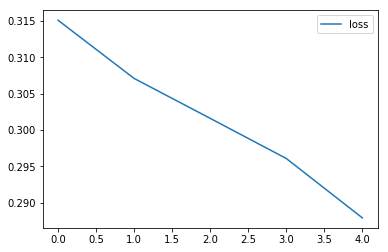

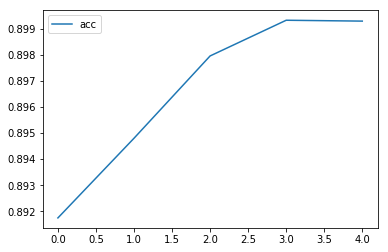

In [46]:
#(history.history)
plt.plot(history.history['loss'],label = 'loss')
plt.legend()
plt.show()
plt.close()

plt.plot(history.history['acc'], label = 'acc')
plt.legend()
plt.show()
plt.close()

In [86]:
test_loss, test_acc = model.evaluate(train_images, train_labels)#TEST THE NEURAL NETWORK
print(test_loss, test_acc)

60000/60000 [==============================] - 3s 55us/step
0.025014872842864133 0.9927
